# Linear Regression

In [1]:
# Common imports
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv("datasets/House.txt", header = None, names=['Size', 'Bedrooms', 'Price'])
housing.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [4]:
housing.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb17fae3ad0>,
      dtype=object)

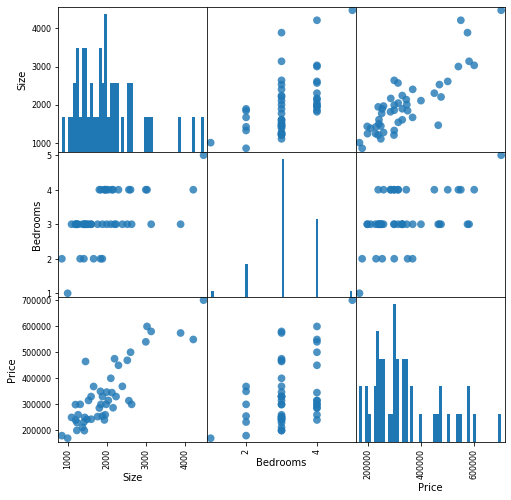

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(housing, figsize=(8, 8),
                           marker='o', hist_kwds={'bins': 50}, s=60,
                           alpha=.8)

In [6]:
X = housing[["Size"]]

In [7]:
X.shape

(47, 1)

In [8]:
y = housing.Price

In [9]:
y.shape

(47,)

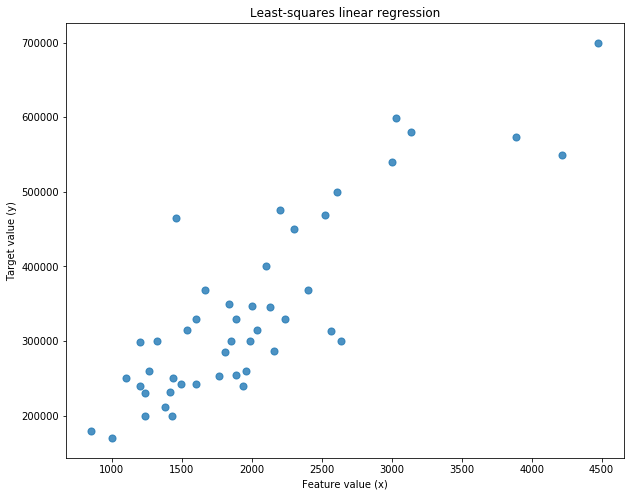

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X, y)

In [12]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [134.52528772]
linear model intercept (b): 71270.492
R-squared score: 0.731


In [13]:
X_new = [[3000]]

In [14]:
linreg.predict(X_new)

array([474846.35560945])

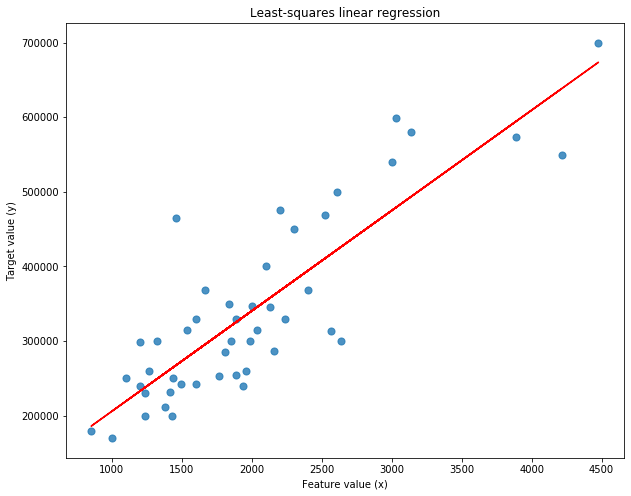

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

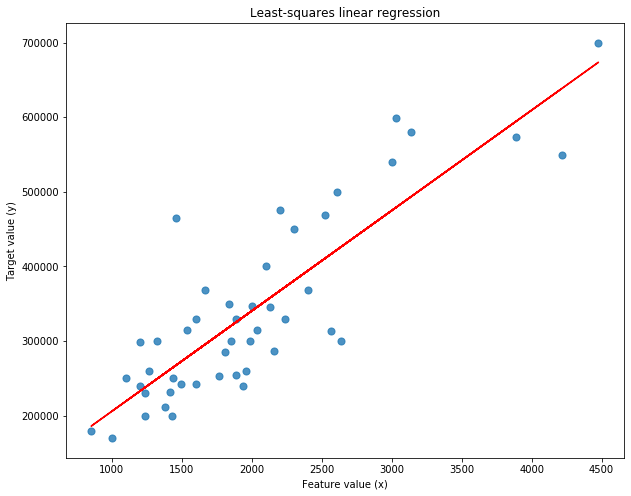

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.predict(X), 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

housing_predictions = linreg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

64158.12872010906

In [18]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, housing_predictions)
lin_mae

52004.8139986077